In [ ]:
!pip install pandas


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
sns.set()
sns.set(style="darkgrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Guvi data set/E-commerce data.csv',encoding="unicode_escape")
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [ ]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


**Problem Statements:**

*1. Perform Basic EDA*

a. Boxplot – All Numeric Variables


{'boxes': [<matplotlib.lines.Line2D at 0x7f2c871da310>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2c8716ddd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2c87174e10>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2c871748d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2c8716d350>,
  <matplotlib.lines.Line2D at 0x7f2c8717bf10>]}

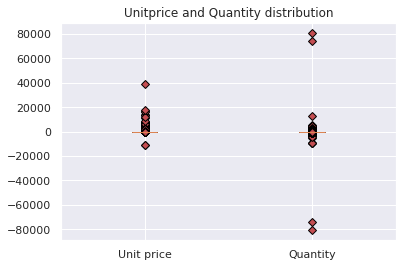

In [ ]:
data = df[['UnitPrice','Quantity']]

red_diamond = dict(markerfacecolor='r', marker='D')

plt.title("Unitprice and Quantity distribution")
plt.boxplot(data.values, labels=["Unit price","Quantity"],flierprops = red_diamond)


b. Histogram – All Numeric Variables


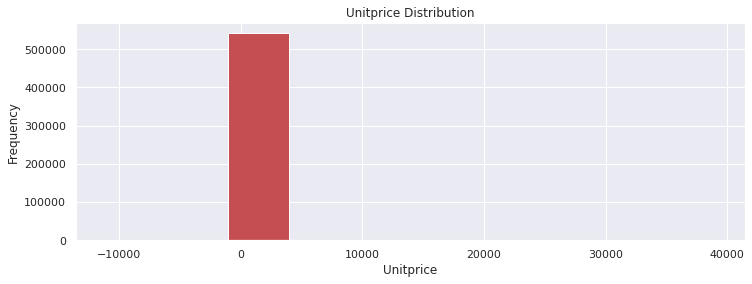

In [ ]:
plt.figure(figsize=(12,4))

plt.title("Unitprice Distribution")

plt.xlabel("Unitprice")
plt.ylabel("Frequency")

plt.hist(df['UnitPrice'],color='r')
plt.show()

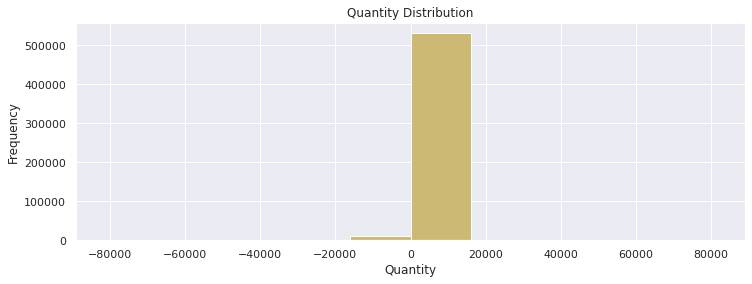

In [ ]:
plt.figure(figsize=(12,4))

plt.title("Quantity Distribution")

plt.xlabel("Quantity")
plt.ylabel("Frequency")

plt.hist(df['Quantity'],color='y')
plt.show()


c. Distribution Plot – All Numeric Variables


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


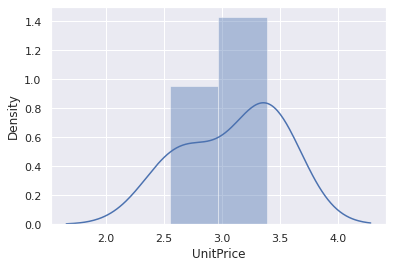

In [ ]:
sns.distplot((df.head()['UnitPrice']))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


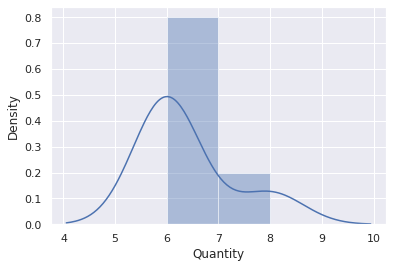

In [ ]:
sns.distplot((df.head()['Quantity']))


d. Aggregation for all numerical Columns


In [ ]:
df.aggregate({"Quantity" : ['mean','std','median','count','sum','max','min'],
                   "UnitPrice" : ['mean','std','median','count','sum','max','min'],
                  "CustomerID" : ['mean','std','median','count','sum','max','min']}).round(2)

,Quantity,UnitPrice,CustomerID
mean,9.55,4.61,1.528769e+04
std,218.08,96.76,1.713600e+03
median,3.00,2.08,1.515200e+04
count,541909.00,541909.00,4.068290e+05
sum,5176450.00,2498803.97,6.219476e+09
max,80995.00,38970.00,1.828700e+04
min,-80995.00,-11062.06,1.234600e+04



e. Unique Values across all columns


In [ ]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


f. Duplicate values across all columns


In [ ]:
duplicate = df[df.duplicated()]
duplicate

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom



g. Correlation – Heatmap - All Numeric Variables


In [ ]:
df.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001235,-0.00360
UnitPrice,-0.001235,1.000000,-0.00456
CustomerID,-0.003600,-0.004560,1.00000


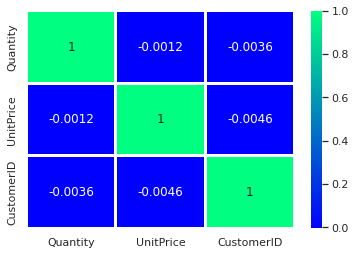

In [ ]:
sns.heatmap(df.corr(), annot = True,linewidths=2,cmap='winter')


h. Regression Plot - All Numeric Variables


Text(0.5, 1.0, 'UnitPrice vs Quantity')

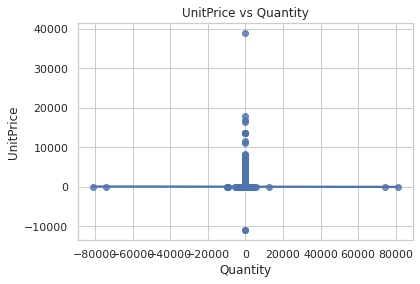

In [ ]:


sns.set_style('whitegrid')
sns.regplot(data=df, x='Quantity',y='UnitPrice')
plt.title('UnitPrice vs Quantity')





i. Bar Plot – Every Categorical Variable vs every Numerical Variable


In [ ]:
df.groupby('Country')['Quantity'].mean()

Country
Australia               66.444003
Austria                 12.037406
Bahrain                 13.684211
Belgium                 11.189947
Brazil                  11.125000
Canada                  18.298013
Channel Islands         12.505277
Cyprus                  10.155949
Czech Republic          19.733333
Denmark                 21.048843
EIRE                    17.403245
European Community       8.147541
Finland                 15.346763
France                  12.911067
Germany                 12.369458
Greece                  10.657534
Hong Kong               16.559028
Iceland                 13.505495
Israel                  14.656566
Italy                    9.961395
Japan                   70.441341
Lebanon                  8.577778
Lithuania               18.628571
Malta                    7.433071
Netherlands             84.406580
Norway                  17.722836
Poland                  10.712610
Portugal                10.651745
RSA                      6.068966
Saudi 


i. Bar Plot – Every Categorical Variable vs every Numerical Variable


In [ ]:

df.groupby('Country')['Quantity'].mean()

Country
Australia               66.444003
Austria                 12.037406
Bahrain                 13.684211
Belgium                 11.189947
Brazil                  11.125000
Canada                  18.298013
Channel Islands         12.505277
Cyprus                  10.155949
Czech Republic          19.733333
Denmark                 21.048843
EIRE                    17.403245
European Community       8.147541
Finland                 15.346763
France                  12.911067
Germany                 12.369458
Greece                  10.657534
Hong Kong               16.559028
Iceland                 13.505495
Israel                  14.656566
Italy                    9.961395
Japan                   70.441341
Lebanon                  8.577778
Lithuania               18.628571
Malta                    7.433071
Netherlands             84.406580
Norway                  17.722836
Poland                  10.712610
Portugal                10.651745
RSA                      6.068966
Saudi 

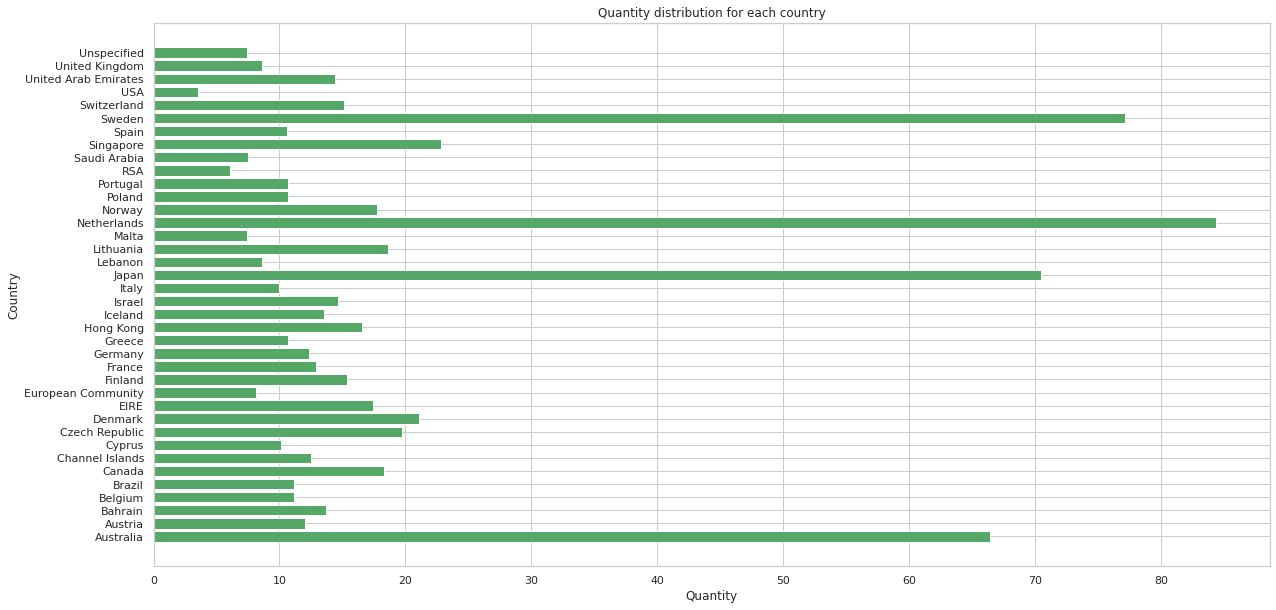

In [ ]:
data_country_quantity = df.groupby('Country')['Quantity'].mean()

x = data_country_quantity.values.tolist()
y = data_country_quantity.index.tolist()

plt.figure(figsize=(20,10))

plt.xlabel("Quantity")
plt.ylabel("Country")

plt.title("Quantity distribution for each country")

plt.barh(y,x,color=['g'])
plt.show()

In [ ]:
df.groupby('Country')['UnitPrice'].mean()

Country
Australia                 3.220612
Austria                   4.243192
Bahrain                   4.556316
Belgium                   3.644335
Brazil                    4.456250
Canada                    6.030331
Channel Islands           4.932124
Cyprus                    6.302363
Czech Republic            2.938333
Denmark                   3.256941
EIRE                      5.911077
European Community        4.820492
Finland                   5.448705
France                    5.028864
Germany                   3.966930
Greece                    4.885548
Hong Kong                42.505208
Iceland                   2.644011
Israel                    3.633131
Italy                     4.831121
Japan                     2.276145
Lebanon                   5.387556
Lithuania                 2.841143
Malta                     5.244173
Netherlands               2.738317
Norway                    6.012026
Poland                    4.170880
Portugal                  8.582976
RSA         

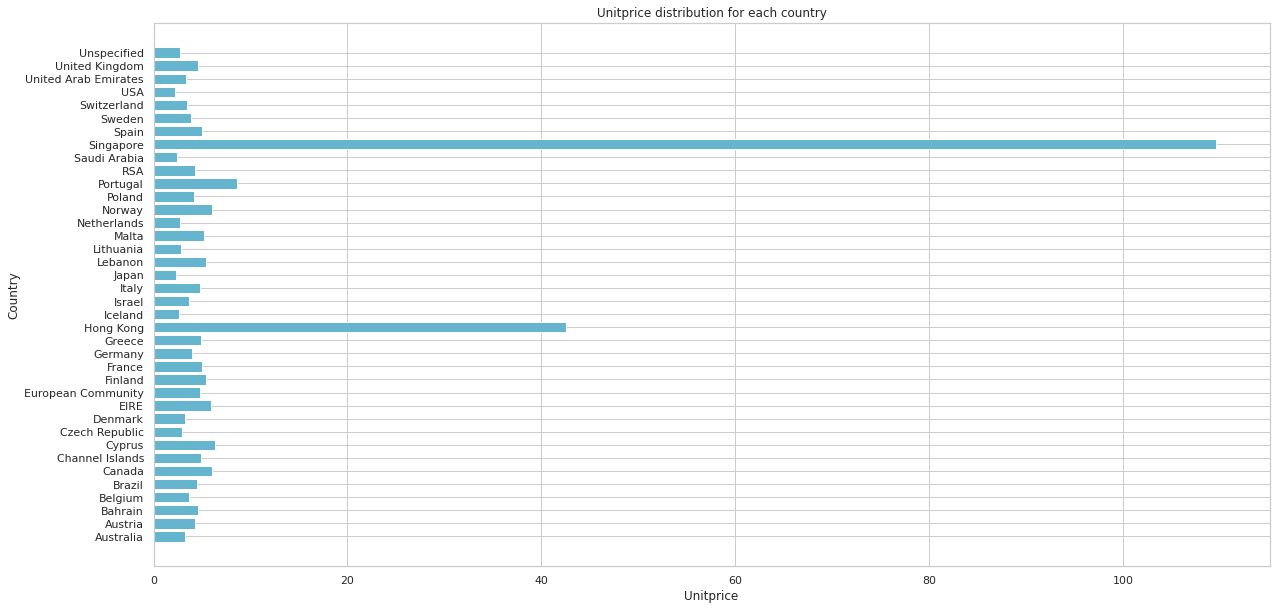

In [ ]:
data_country_unitprice = df.groupby('Country')['UnitPrice'].mean()

x = data_country_unitprice.values.tolist()
y = data_country_unitprice.index.tolist()

plt.figure(figsize=(20,10))

plt.xlabel("Unitprice")
plt.ylabel("Country")

plt.title("Unitprice distribution for each country")

plt.barh(y,x,color=['c'])
plt.show()

In [ ]:
df.groupby('Country')['CustomerID'].mean()

Country
Australia               12464.656076
Austria                 12521.451372
Bahrain                 12354.529412
Belgium                 12430.298695
Brazil                  12769.000000
Canada                  17321.079470
Channel Islands         14888.151715
Cyprus                  12404.951768
Czech Republic          12781.000000
Denmark                 12536.591260
EIRE                    14748.396126
European Community      15108.000000
Finland                 12517.012950
France                  12677.995996
Germany                 12646.139336
Greece                  13757.424658
Hong Kong                        NaN
Iceland                 12347.000000
Israel                  12657.868000
Italy                   12648.397260
Japan                   12757.798883
Lebanon                 12764.000000
Lithuania               15332.000000
Malta                   16996.031496
Netherlands             14420.302826
Norway                  12437.984346
Poland                  12733.

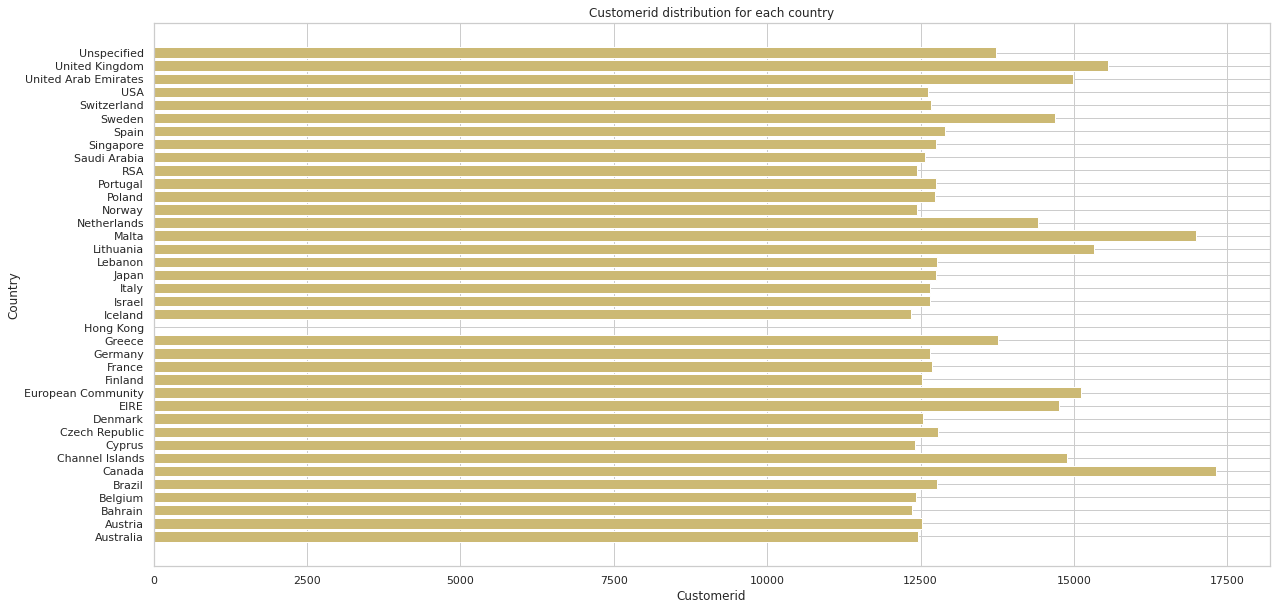

In [ ]:
data_country_unitprice = df.groupby('Country')['CustomerID'].mean()

x = data_country_unitprice.values.tolist()
y = data_country_unitprice.index.tolist()

plt.figure(figsize=(20,10))

plt.xlabel("Customerid")
plt.ylabel("Country")

plt.title("Customerid distribution for each country")

plt.barh(y,x,color=['y'])
plt.show()


j. Pair plot - All Numeric Variables


In [ ]:
#sns.pairplot(df,vars=["Quantity","UnitPrice","CustomerID","Country"])
#plt.show()




k. Line chart to show the trend of data - All Numeric/Date Variables


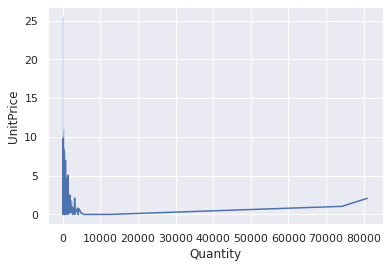

In [ ]:
sns.lineplot(data=df, x="Quantity",y="UnitPrice")

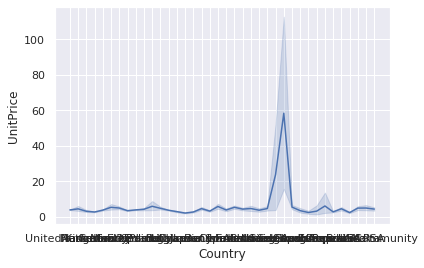

In [ ]:
sns.lineplot(data=df, x="Country", y="UnitPrice")

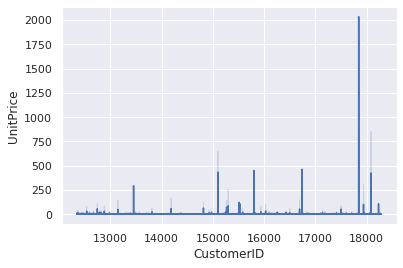

In [ ]:
sns.lineplot(data=df, x="CustomerID", y="UnitPrice")


l. Plot the skewness - All Numeric Variables


In [ ]:
df['Skewed Data'] = pd.DataFrame(df.skew(axis=1,skipna=True))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


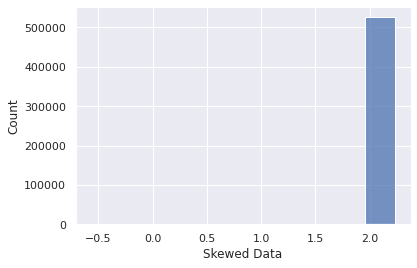

In [ ]:
sns.histplot(df['Skewed Data'],bins=10);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


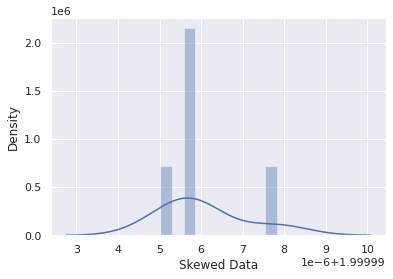

In [ ]:
sns.distplot(df['Skewed Data'].head(), bins=10)


2. Check for missing values in all columns and replace them with the appropriate metric(Mean/Median/Mode)


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.Description.mode()

0    WHITE HANGING HEART T-LIGHT HOLDER
dtype: object

In [ ]:
df.Description.fillna(df.Description.mode()[0],inplace = True)

In [ ]:
df.CustomerID.mean()

15287.690570239585

In [ ]:
df['CustomerID'].fillna(df['CustomerID'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


3. Remove duplicate rows


In [ ]:
df.duplicated().sum()

5268

In [ ]:
df.loc[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [ ]:
df.drop_duplicates(subset=None, keep='first',inplace=True)

In [ ]:
df.duplicated().sum()

0


4. Remove rows which have negative values in Quantity column


In [ ]:
df = df[df.Quantity > 0]

In [ ]:
df['Quantity'].describe().round(2)

count    526054.00
mean         10.73
std         157.59
min           1.00
25%           1.00
50%           4.00
75%          11.00
max       80995.00
Name: Quantity, dtype: float64


6. How many orders made by the customers?


In [ ]:
df.groupby(by=['CustomerID','Country'], as_index=False)['Quantity'].count().head()

,CustomerID,Country,Quantity
0,12346.0,United Kingdom,1
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17


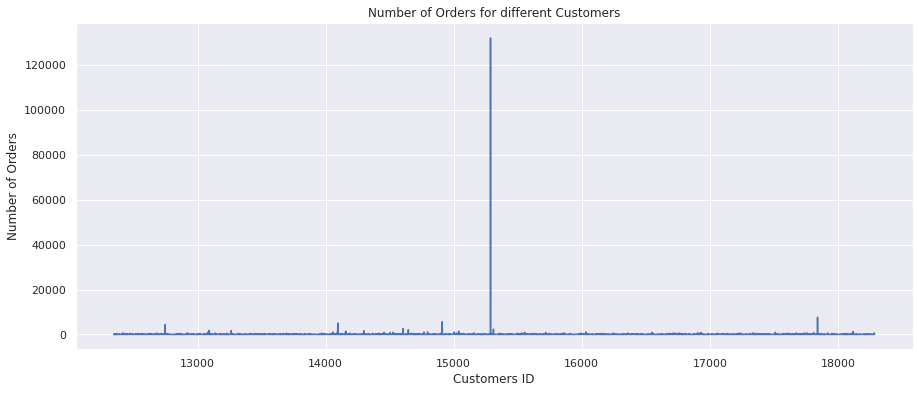

In [ ]:


orders = df.groupby(by=['CustomerID','Country'], as_index=False)['Quantity'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.Quantity)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()




7. TOP 5 customers with higher number of orders


In [ ]:


print("Top 5 customers with highest number of orders are : ")
orders.sort_values(by='Quantity', ascending=False).head()



Top 5 customers with highest number of orders are : 


,CustomerID,Country,Quantity
2176,15287.69057,United Kingdom,131916
4028,17841.00000,United Kingdom,7676
1888,14911.00000,EIRE,5672
1298,14096.00000,United Kingdom,5111
334,12748.00000,United Kingdom,4413




8. How many orders for each country?





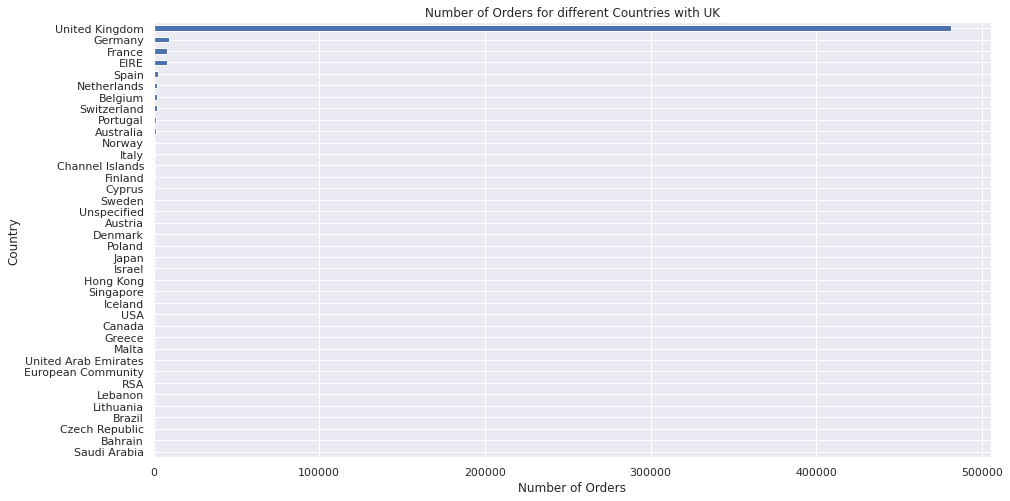

In [ ]:


group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()

plt.subplots(figsize=(15,8))
group_country_orders.plot(kind = 'barh')
plt.xlabel('Number of Orders')
plt.ylabel('Country')
plt.title('Number of Orders for different Countries with UK')
plt.show()



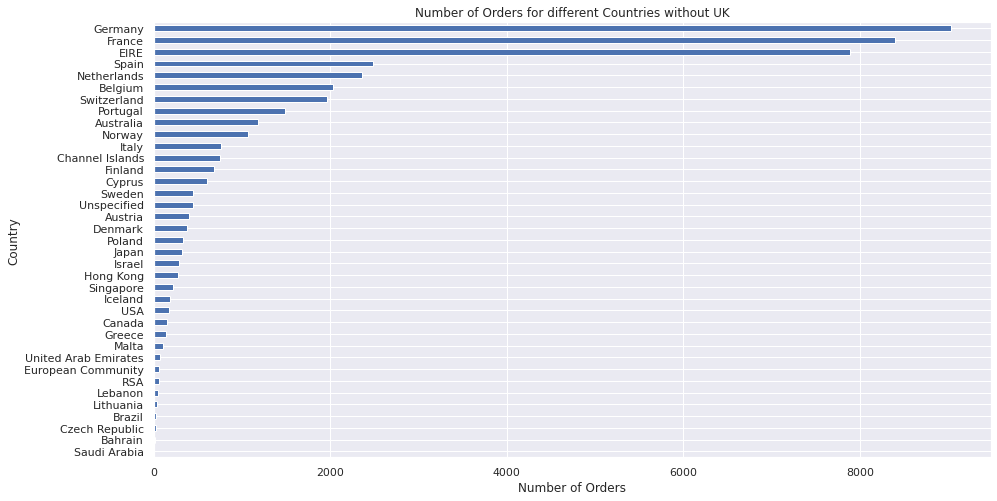

In [ ]:
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()

del group_country_orders['United Kingdom']

plt.subplots(figsize=(15,8))
group_country_orders.plot(kind = 'barh')
plt.xlabel('Number of Orders')
plt.ylabel('Country')
plt.title('Number of Orders for different Countries without UK')
plt.show()